In [1]:
import pandas as pd
import numpy as np
import glob
import json

import base64
from PIL import Image
import cv2
import io
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


In [2]:
ts_paths = glob.glob("/kaggle/input/glioma-mcd-2025/Data_122824/Glioma_MDC_2025_test/*.jpg")
test = pd.DataFrame({"img_path": ts_paths})
test["json_path"] = test["img_path"].str.replace(".jpg", ".json")
test

,img_path,json_path
0,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
1,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
2,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
3,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
4,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
...,...,...
195,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
196,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
197,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
198,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...


In [3]:
tr_paths = glob.glob("/kaggle/input/glioma-mcd-2025/Data_122824/Glioma_MDC_2025_training/*.jpg")
train = pd.DataFrame({"img_path": tr_paths})
train["json_path"] = train["img_path"].str.replace(".jpg", ".json")
train

,img_path,json_path
0,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
1,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
2,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
3,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
4,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
...,...,...
1434,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
1435,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
1436,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...
1437,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...,/kaggle/input/glioma-mcd-2025/Data_122824/Glio...


In [4]:
json_path = train.loc[2, 'json_path'] 

with open(json_path, 'r') as f:
    data = json.load(f)

# print(json.dumps(data, indent=2))

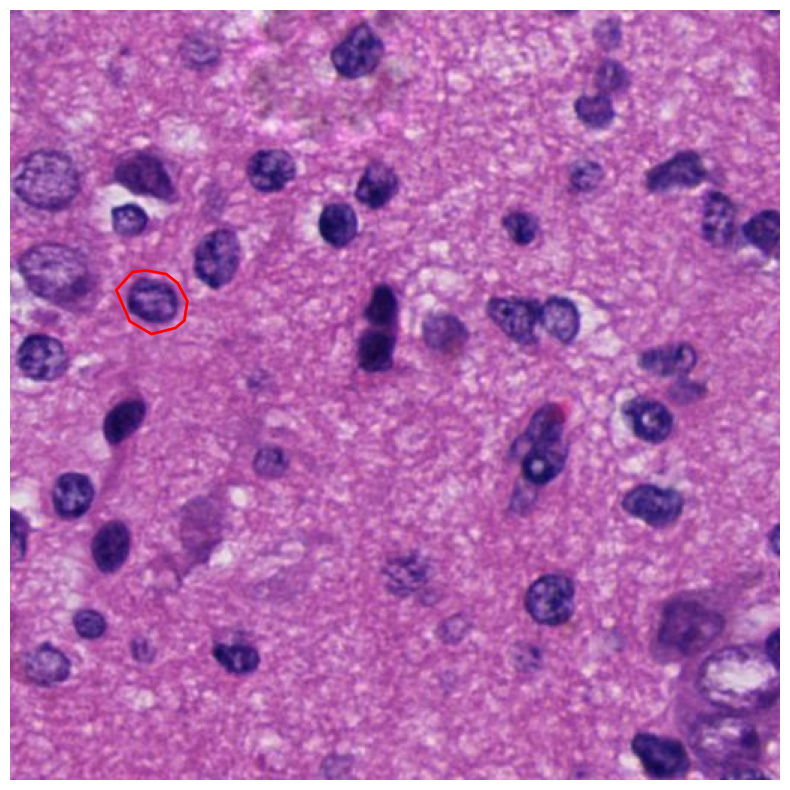

In [5]:
# JSONデータから画像のBase64文字列を取得
with open(json_path, 'r') as f:
    data = json.load(f)
    img_data = data['imageData']
    points = data['shapes'][0]['points']  # ポリゴンの頂点座標

# Base64をデコードして画像を読み込み
img_bytes = base64.b64decode(img_data)
img = Image.open(io.BytesIO(img_bytes))
img_array = np.array(img)

# プロット
plt.figure(figsize=(10, 10))
plt.imshow(img_array)

# ポリゴンを描画
polygon = Polygon(points, fill=False, edgecolor='r', linewidth=2)
plt.gca().add_patch(polygon)

plt.axis('off')
plt.show()

In [6]:
def extract_and_save_regions(json_path, margin=20, output_dir='extracted_regions/'):
    """
    JSONファイルからアノテーション領域を切り出して保存する関数
    
    Parameters:
    -----------
    json_path : str
        JSONファイルのパス
    margin : int
        切り出し領域の周りに追加するマージン（ピクセル）
    output_dir : str
        保存先ディレクトリ
    """
    import os
    from pathlib import Path

    # 出力ディレクトリの作成
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # JSONファイルの読み込み
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    # 画像の読み込み
    img_bytes = base64.b64decode(data['imageData'])
    img = Image.open(io.BytesIO(img_bytes))
    
    # 各アノテーション領域について処理
    for i, shape in enumerate(data['shapes']):
        points = np.array(shape['points'])
        label = shape['label']
        
        # バウンディングボックスの計算
        min_x, min_y = np.floor(points.min(axis=0)).astype(int)
        max_x, max_y = np.ceil(points.max(axis=0)).astype(int)
        
        # マージンの追加（画像サイズを超えないように調整）
        min_x = max(0, min_x - margin)
        min_y = max(0, min_y - margin)
        max_x = min(img.width, max_x + margin)
        max_y = min(img.height, max_y + margin)
        
        # 領域の切り出し
        region = img.crop((min_x, min_y, max_x, max_y))
        
        # ファイル名の生成と保存
        filename = f"{label}_{i:03d}.jpg"
        save_path = os.path.join(output_dir, filename)
        region.save(save_path, quality=95)
        
        print(f"Saved region {i+1} ({label}) to {save_path}")

In [7]:
import json
import base64
import pandas as pd
import numpy as np
from PIL import Image
import io
from pathlib import Path

def process_dataset(df, output_dir='processed_data/'):
    """
    Process entire dataset from DataFrame containing image and json paths
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with columns 'img_path' and 'json_path'
    output_dir : str
        Directory to save processed data
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with processed data information
    """
    # Create output directory
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # Initialize lists for new DataFrame
    processed_data = []
    
    # Process each entry in DataFrame
    for idx, row in df.iterrows():
        # Load JSON data
        with open(row['json_path'], 'r') as f:
            data = json.load(f)
        
        # Get base filename from json_path (remove .json extension)
        base_filename = Path(row['json_path']).stem
        
        # Generate output filename with sequential number
        output_filename = f"{base_filename}_{idx:04d}.png"
        output_path = Path(output_dir) / output_filename
        
        # Process image
        if 'imageData' in data:
            # Decode base64 image data
            img_bytes = base64.b64decode(data['imageData'])
            img = Image.open(io.BytesIO(img_bytes))
            
            # Save image as PNG with full quality
            img.save(output_path, format='PNG')
            
            # Extract annotation information
            for shape in data['shapes']:
                processed_data.append({
                    'filename': output_filename,
                    'label': shape['label'],
                    'is_mitosis': 1 if 'mitosis' in shape['label'].lower() else 0,
                    'points': shape['points'],
                    'shape_type': shape['shape_type']
                })
    
    # Create new DataFrame with processed information
    result_df = pd.DataFrame(processed_data)
    
    # Save DataFrame to CSV
    result_df.to_csv(Path(output_dir) / 'annotations.csv', index=False)
    
    return result_df

# Example usage
# df should have columns 'img_path' and 'json_path'
# processed_df = process_dataset(df, output_dir='processed_data/')

In [8]:
def extract_and_save_regions(df, margin=20, output_dir='extracted_regions/'):
    """
    Extract and save annotated regions from dataset with associated metadata
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing image and json paths
    margin : int
        Margin to add around the annotated region (in pixels)
    output_dir : str
        Directory to save extracted regions
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame containing information about extracted regions
    """
    import os
    from pathlib import Path
    
    # Create output directory
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # Initialize list for storing region information
    regions_data = []
    
    # Process each entry in DataFrame
    for idx, row in df.iterrows():
        # Load JSON data
        with open(row['json_path'], 'r') as f:
            data = json.load(f)
            
        # Get base name from json path (without .json extension)
        base_name = Path(row['json_path']).stem
        
        # Decode image
        img_bytes = base64.b64decode(data['imageData'])
        img = Image.open(io.BytesIO(img_bytes))
        
        # Process each annotation
        for shape_idx, shape in enumerate(data['shapes']):
            points = np.array(shape['points'])
            label = shape['label']
            
            # Calculate bounding box
            min_x, min_y = np.floor(points.min(axis=0)).astype(int)
            max_x, max_y = np.ceil(points.max(axis=0)).astype(int)
            
            # Add margin (ensure within image bounds)
            min_x = max(0, min_x - margin)
            min_y = max(0, min_y - margin)
            max_x = min(img.width, max_x + margin)
            max_y = min(img.height, max_y + margin)
            
            # Extract region
            region = img.crop((min_x, min_y, max_x, max_y))
            
            # Generate filename using json name and number
            filename = f"{base_name}_{shape_idx}.png"
            save_path = os.path.join(output_dir, filename)
            region.save(save_path, format='PNG')
            
            # Store region information
            regions_data.append({
                'filename': filename,
                'original_json': row['json_path'],
                'label': label,
                'is_mitosis': 1 if 'mitosis' in label.lower() else 0,
                'bbox': [min_x, min_y, max_x, max_y],
                'region_size': (max_x - min_x, max_y - min_y)
            })
    
    # Create and save DataFrame
    result_df = pd.DataFrame(regions_data)
    result_df.to_csv(os.path.join(output_dir, 'regions_metadata.csv'), index=False)
    
    return result_df

# Example usage
# result_df = extract_and_save_regions(df, margin=20, output_dir='extracted_regions')

In [9]:
# Assuming df is your input DataFrame
output_dir = 'train_pngs'
result_df = extract_and_save_regions(train, margin=5,output_dir=output_dir)
# result_df.to_csv("train.csv", index=False)